# English Premier League: The Reliability of Teams, Players, and Odds


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

SecretNotFoundError: Secret KAGGLE_KEY does not exist.

#### Import Data

In [ ]:
# load datasets from kaggle using secret
if os.path.exists('./uncovering-betting-patterns-in-the-premier-leagu.zip') == False:
  !kaggle datasets download -d thedevastator/uncovering-betting-patterns-in-the-premier-leagu
  ! unzip -q "uncovering-betting-patterns-in-the-premier-leagu.zip"

if os.path.exists('./premier-league-player-statistics-updated-daily.zip') == False:
  !kaggle datasets download -d rishikeshkanabar/premier-league-player-statistics-updated-daily
  ! unzip -q "premier-league-player-statistics-updated-daily.zip"

Dataset URL: https://www.kaggle.com/datasets/thedevastator/uncovering-betting-patterns-in-the-premier-leagu
License(s): CC0-1.0
  0% 0.00/831k [00:00<?, ?B/s]
100% 831k/831k [00:00<00:00, 40.9MB/s]
Dataset URL: https://www.kaggle.com/datasets/rishikeshkanabar/premier-league-player-statistics-updated-daily
License(s): CC-BY-NC-SA-4.0
  0% 0.00/34.4k [00:00<?, ?B/s]
100% 34.4k/34.4k [00:00<00:00, 37.9MB/s]


In [ ]:
betting = pd.read_csv('./2020.csv')
betting

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


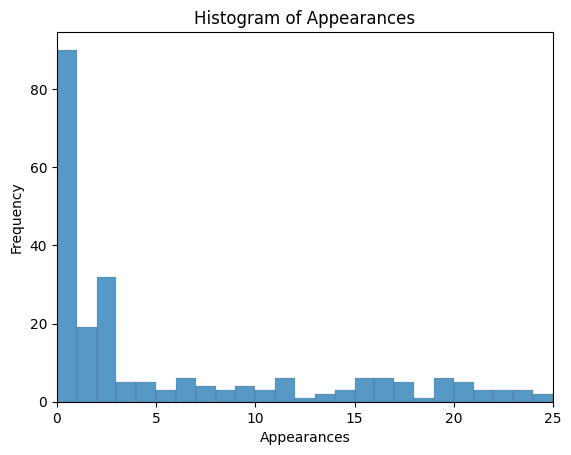

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Vitinha,20.0,Wolves,Midfielder,Portugal,20.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
566,Pedro Neto,7.0,Wolves,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolves,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolves,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0


In [ ]:
players = pd.read_csv('./dataset - 2020-09-24.csv')

# drop Goals per match column due to known issue discussed on kaggle page
players = players.drop("Goals per match", axis=1)


# change club names in "players" df to match those in "betting" df
club_mapping = {
    'Arsenal': 'Arsenal',
    'Aston-Villa': 'Aston Villa',
    'Brighton-and-Hove-Albion': 'Brighton',
    'Burnley': 'Burnley',
    'Chelsea': 'Chelsea',
    'Crystal-Palace': 'Crystal Palace',
    'Everton': 'Everton',
    'Fulham': 'Fulham',
    'Leeds-United': 'Leeds',
    'Leicester-City': 'Leicester',
    'Liverpool': 'Liverpool',
    'Manchester-City': 'Man City',
    'Manchester-United': 'Man United',
    'Newcastle-United': 'Newcastle',
    'Sheffield-United': 'Sheffield United',
    'Southampton': 'Southampton',
    'Tottenham-Hotspur': 'Tottenham',
    'West-Bromwich-Albion': 'West Brom',
    'West-Ham-United': 'West Ham',
    'Wolverhampton-Wanderers': 'Wolves'
}
players['Club'] = players['Club'].replace(club_mapping)

# replace percentage strings with probabilities [0,1] (for later clustering)
for col in ['Shooting accuracy %', 'Tackle success %', 'Cross accuracy %']:
    players[col] = players[col].str.rstrip('%').astype('float') / 100

# restrict to players with at least one appearance
players = players[players['Appearances'] > 0]

players

#### Select Columns and Encode Teams as Numbers

In [ ]:
# code cell only demonstrates what betting data is available in the dataset
print("All Columns:", list(betting.columns))
betting[['HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']].head(3)

All Columns: ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']


,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,...,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Fulham,Arsenal,A,6.00,4.33,1.53,5.50,4.25,1.57,6.00,...,1.53,6.5,4.20,1.55,6.55,4.55,1.60,5.94,4.34,1.55
1,Crystal Palace,Southampton,H,3.10,3.25,2.37,3.00,3.20,2.45,3.15,...,2.35,3.2,3.20,2.40,3.36,3.36,2.50,3.18,3.22,2.39
2,Liverpool,Leeds,H,1.28,6.00,9.50,1.26,6.25,10.50,1.35,...,10.00,1.3,5.75,10.50,1.35,6.50,10.75,1.30,5.96,9.68


In [ ]:
# select which variable to predict (full time result), and which to use as evidence (betting odds)
# X = betting.loc[:,['HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']]
X = betting.loc[:,['HomeTeam', 'AwayTeam', 'AvgH', 'AvgD', 'AvgA']]
y = betting.loc[:,'FTR']

In [ ]:
# encode teams as numbers (for logistic regression)
le = LabelEncoder()
X['HomeTeam'] = le.fit_transform(X['HomeTeam'])
X['AwayTeam'] = le.fit_transform(X['AwayTeam'])
X.head(3)

,HomeTeam,AwayTeam,AvgH,AvgD,AvgA
0,7,0,5.94,4.34,1.55
1,5,15,3.18,3.22,2.39
2,10,8,1.30,5.96,9.68


In [ ]:
# convert odds to probabilities and normalize such that (home wins, away wins, and draw add up to 1)
def convert_row_to_probs(row):
  row = 1/row # convert odds to probabilities
  row /= row.sum() # normalize so each row adds to one
  return row


X[['AvgH', 'AvgD', 'AvgA']] = X[['AvgH', 'AvgD', 'AvgA']].apply(convert_row_to_probs, axis=1)
X.head(3)

,HomeTeam,AwayTeam,AvgH,AvgD,AvgA
0,7,0,0.161266,0.220719,0.618014
1,5,15,0.301375,0.297632,0.400993
2,10,8,0.739416,0.161282,0.099302


#### Train Model on betting odds

In [ ]:
# split into training and test sets

split_index = int(len(X)*.8) # splitting first 80% (304) of matches for training
X_train = X[0:split_index]
X_test = X[split_index:]
y_train = y[0:split_index]
y_test = y[split_index:]

print(len(y_train), len(y_test))

304 76


In [ ]:
# can replace odds_model with any kind of classifer, e.g.:

# from sklearn.neural_network import MLPClassifier
# odds_model = MLPClassifier(hidden_layer_sizes=(100, 100, 50, ), max_iter=1000, solver='adam', random_state=42)


odds_model = LogisticRegression(max_iter=1000)

odds_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Evaluate Model Performance

Accuracy:  0.5657894736842105
Classification Report:
               precision    recall  f1-score   support

           A       0.55      0.72      0.62        32
           D       0.00      0.00      0.00        13
           H       0.59      0.65      0.62        31

    accuracy                           0.57        76
   macro avg       0.38      0.45      0.41        76
weighted avg       0.47      0.57      0.51        76



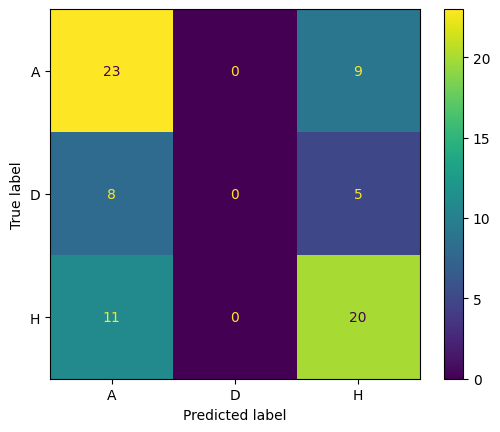

In [ ]:
y_pred = odds_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0.0)

print("Accuracy: ", acc)
print("Classification Report:\n", cr)

ConfusionMatrixDisplay.from_estimator(odds_model, X_test, y_test); # https://scikit-learn.org/dev/auto_examples/release_highlights/plot_release_highlights_1_5_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-1-5-0-py

#### Accuracy by team

In [ ]:
# separate the test matches by team
matches_by_team = {}

teams = range(0,20)

for team in teams:
    matches = X_test[(X_test['HomeTeam'] == team) | (X_test['AwayTeam'] == team)]
    labels = y_test[(X_test['HomeTeam'] == team) | (X_test['AwayTeam'] == team)]
    matches_by_team[team] = {'x': matches, 'y': labels}

In [ ]:
# evaluate performance of odds_model for each team
for team in matches_by_team:
  y_pred = odds_model.predict(matches_by_team[team]['x'])
  acc = accuracy_score(matches_by_team[team]['y'], y_pred)
  matches_by_team[team]['test_acc'] = acc


# sort teams by the model's performance (precursor to "reliability" measure)
team_accuracies = [(le.inverse_transform([team])[0], matches_by_team[team]['test_acc']) for team in matches_by_team]

teams_df = pd.DataFrame(team_accuracies, columns=['Club', 'Accuracy'])
teams_df = teams_df.sort_values(by='Accuracy', ascending=False)
teams_df

,Club,Accuracy
5,Crystal Palace,0.857143
0,Arsenal,0.750000
15,Southampton,0.750000
3,Burnley,0.750000
12,Man United,0.750000
10,Liverpool,0.714286
11,Man City,0.666667
14,Sheffield United,0.625000
17,West Brom,0.625000
19,Wolves,0.571429


#### Team and player reliability

In [ ]:
# classify team's reliability based on model's accuracy

def acc_to_reliability(accuracy):
    if accuracy <= 0.2:
        return "very unreliable"
    elif accuracy <= 0.4:
        return "unreliable"
    elif accuracy <= 0.6:
        return "neutral"
    elif accuracy <= 0.8:
        return "reliable"
    else:
        return "very reliable"

# add reliability column
teams_df['Reliability'] = teams_df['Accuracy'].apply(acc_to_reliability)

teams_df

,Club,Accuracy,Reliability
5,Crystal Palace,0.857143,very reliable
0,Arsenal,0.750000,reliable
15,Southampton,0.750000,reliable
3,Burnley,0.750000,reliable
12,Man United,0.750000,reliable
10,Liverpool,0.714286,reliable
11,Man City,0.666667,reliable
14,Sheffield United,0.625000,reliable
17,West Brom,0.625000,reliable
19,Wolves,0.571429,neutral


In [ ]:
# add club reliability to each player
players = players.merge(teams_df[['Club', 'Reliability']], on='Club', how='left')
players.head(1)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Reliability
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN,reliable


In [ ]:
# select relevant columns
relevant_players_stats = players[[col for col in players.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality']]]

# convert reliability strings into numbers (for corr)
reliability_mapping = {'very unreliable': 1, 'unreliable': 2, 'neutral': 3, 'reliable': 4, 'very reliable': 5}
if isinstance(relevant_players_stats['Reliability'][0], str):
  relevant_players_stats.loc[:, 'Reliability'] = relevant_players_stats['Reliability'].map(reliability_mapping)

correlation_matrix = relevant_players_stats.corr()
reliability_corr = correlation_matrix['Reliability'].sort_values(ascending=False)

print("Correlation with Reliability:")
reliability_corr.head(6)

Correlation with Reliability:


,Reliability
Reliability,1.000000
Last man tackles,0.275526
Wins,0.224653
Clearances off line,0.221009
Duels won,0.212450
Clean sheets,0.211026


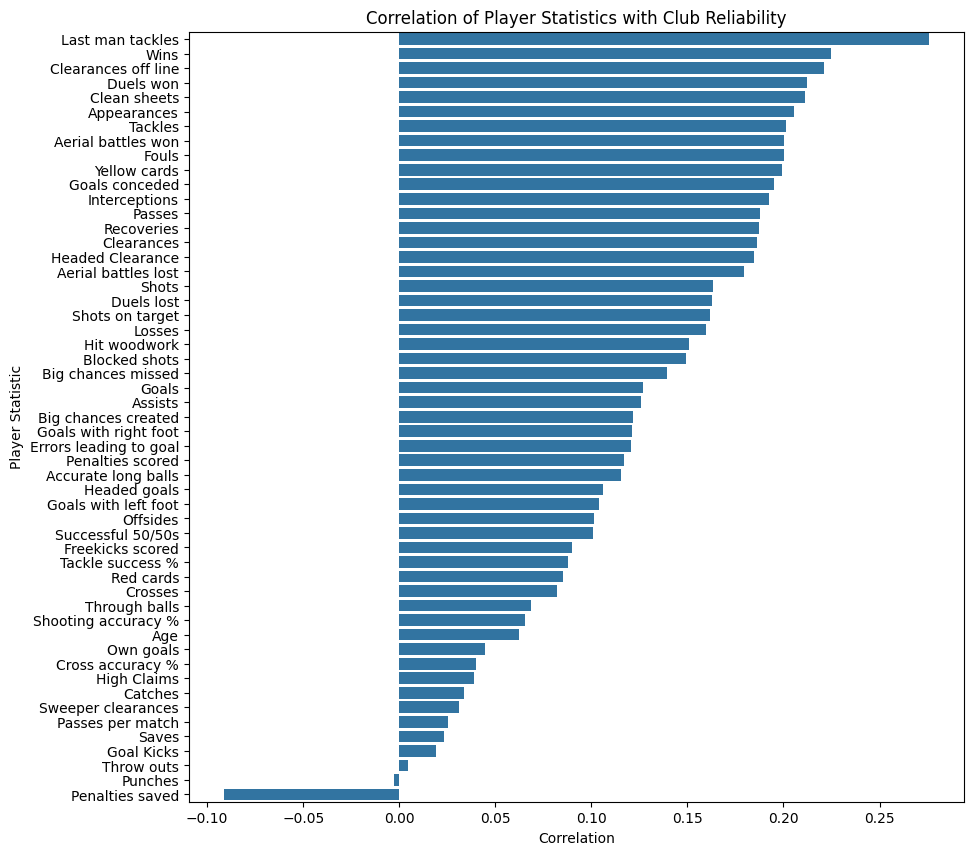

In [ ]:
# show correlations via graph
reliability_corr_df = reliability_corr.drop('Reliability').reset_index()
reliability_corr_df.columns = ['Player Statistic', 'Correlation']

plt.figure(figsize=(10, 10))
plt.title('Correlation of Player Statistics with Club Reliability')
sns.barplot(x='Correlation', y='Player Statistic', data=reliability_corr_df)
plt.show()

In [ ]:
print(f"Variable with largest correlation is \"{correlation_matrix['Reliability'][:-1].idxmax()}\" with coefficient {correlation_matrix['Reliability'][:-1].max()}")

Variable with largest correlation is "Last man tackles" with coefficient 0.27552582098414763


Interesting note: almost all of the statistics correlate positively with Reliability. Theory: almost all the statistics increase with time played, which makes a player more predictable/reliable. All correlations are pretty weak, however, because a single player

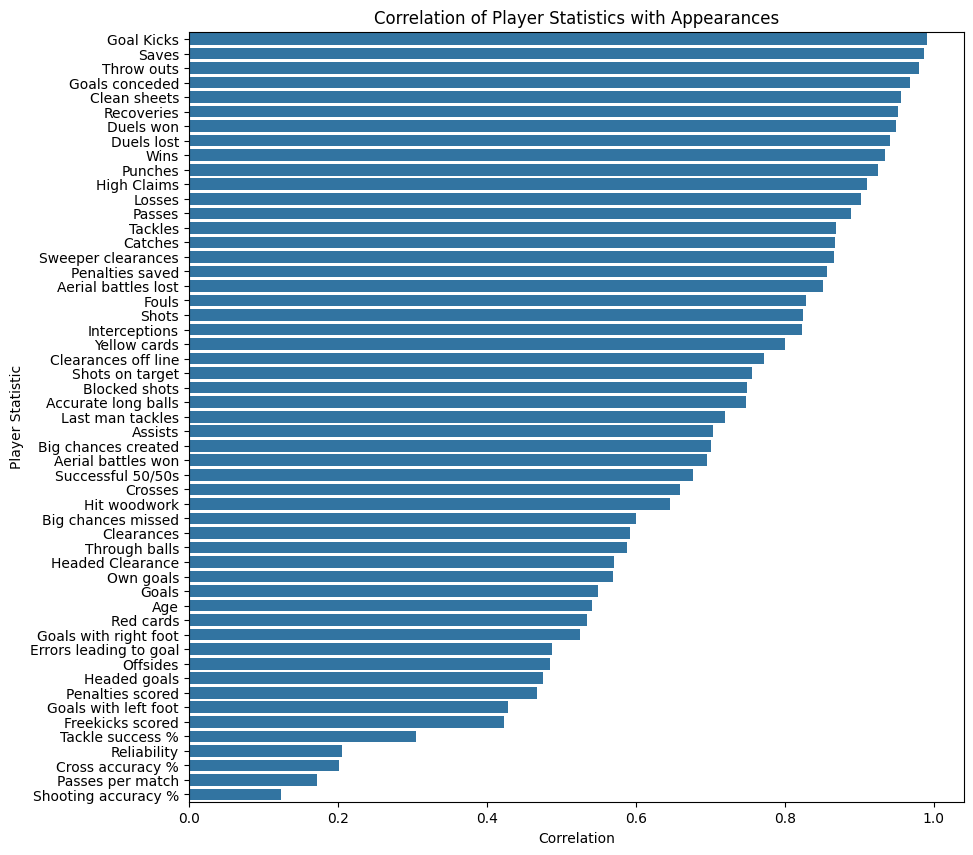

In [ ]:
# show correlations with "appearances" via graph
appearances_corr = correlation_matrix['Appearances'].sort_values(ascending=False)

appearances_corr_df = appearances_corr.drop('Appearances').reset_index()
appearances_corr_df.columns = ['Player Statistic', 'Correlation']

plt.figure(figsize=(10, 10))
plt.title('Correlation of Player Statistics with Appearances')
sns.barplot(x='Correlation', y='Player Statistic', data=appearances_corr_df)
plt.show()

Wins being the variable with largest correlation makes sense, but this is a pretty weak correlation! To determine whether we can still use these player statistics to predict their club's reliability, we can try a classifier.

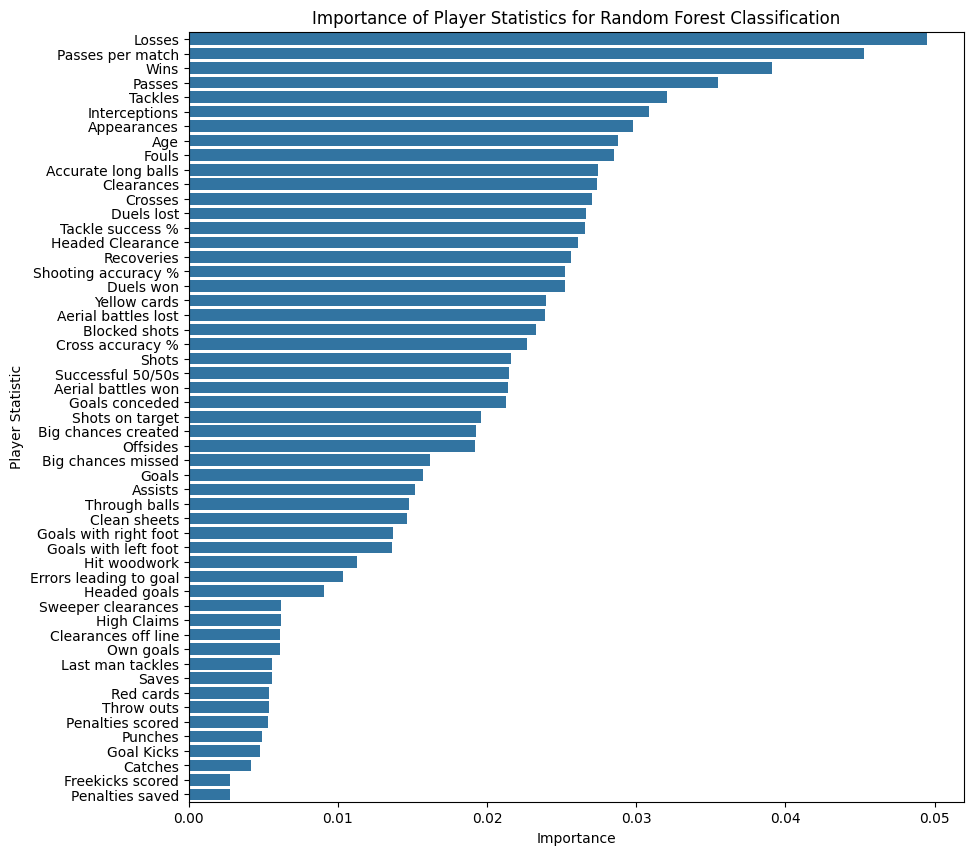

In [ ]:
# get measure of "feature importance"
rf = RandomForestClassifier(n_estimators=1000, random_state=42) # https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
rf.fit(players[[col for col in players.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality', 'Reliability']]], players['Reliability'])

# visualize
plt.figure(figsize=(10, 10))
plt.title('Importance of Player Statistics for Random Forest Classification')

importance = pd.DataFrame({
    'Player Statistic': [col for col in players.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality', 'Reliability']],
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Player Statistic', data=importance) # https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.show()

There are 53 player statistics. If all are equally important, they are 1/53 = 0.019.

In [ ]:
importance.loc[importance['Importance'] > 0.03].sort_values('Importance', ascending=False)

,Player Statistic,Importance
3,Losses,0.049488
35,Passes per match,0.045304
2,Wins,0.039109
34,Passes,0.035493
17,Tackles,0.032063
21,Interceptions,0.030841


#### Final League standings (by point breakdown from matches)

In [ ]:
points = {team: 0 for team in le.inverse_transform(teams)}
points


# calculate final standing by points of each match
for _, game in betting.iterrows():
    home_team = game['HomeTeam']
    away_team = game['AwayTeam']
    result = game['FTR']

    if result == 'H':
        points[home_team] += 3
    elif result == 'A':
        points[away_team] += 3
    elif result == 'D':
        points[home_team] += 1
        points[away_team] += 1

# display final standing against reliability
standings = pd.DataFrame(list(points.items()), columns=['Club', 'Points'])
standings = standings.sort_values(by='Points', ascending=False)
standings = standings.merge(teams_df[['Club', 'Reliability']], on='Club', how='left')

print("End of League Final Standings")
standings

End of League Final Standings


,Club,Points,Reliability
0,Man City,86,reliable
1,Man United,74,reliable
2,Liverpool,69,reliable
3,Chelsea,67,neutral
4,Leicester,66,neutral
5,West Ham,65,neutral
6,Tottenham,62,neutral
7,Arsenal,61,reliable
8,Leeds,59,neutral
9,Everton,59,neutral


#### Predict Match outcomes from all player statistics

In [ ]:
# get players in a club (only stat columns) and take their mean as a way to represent a club by their player's stats
def get_club_stats(team):
  players_in_club = players.loc[players['Club'] == team]
  return players_in_club[[col for col in players_in_club.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality', 'Reliability']]].mean()

get_club_stats("Arsenal").head(5)

,0
Age,25.296296
Appearances,73.148148
Wins,37.222222
Losses,18.592593
Goals,8.555556


In [ ]:
matches_with_club_stats = betting[["HomeTeam", "AwayTeam", "FTR"]].copy()

# convert FTR strings to integers for classification (0=A, 1=D, 2=H)
le_FTR = LabelEncoder()
matches_with_club_stats['FTR'] = le.fit_transform(matches_with_club_stats['FTR'])

print("Matches:")
matches_with_club_stats

Matches:


,HomeTeam,AwayTeam,FTR
0,Fulham,Arsenal,0
1,Crystal Palace,Southampton,2
2,Liverpool,Leeds,2
3,West Ham,Newcastle,0
4,West Brom,Leicester,0
...,...,...,...
375,Liverpool,Crystal Palace,2
376,Man City,Everton,2
377,Sheffield United,Burnley,2
378,West Ham,Southampton,2


In [ ]:
# Replace the "HomeTeam" and "AwayTeam" columns of matches with their representation based on aggregated player stas
def replace_clubs_with_stats(matches_with_club_stats):
    new_row = []
    for _, row in matches_with_club_stats.iterrows():
        home_team_stats = get_club_stats(row['HomeTeam'])
        away_team_stats = get_club_stats(row['AwayTeam'])

        match_data = pd.concat([home_team_stats, away_team_stats]).to_frame().T
        match_data['FTR'] = row['FTR']
        new_row.append(match_data)

    updated_matches_df = pd.concat(new_row)
    return updated_matches_df

matches_with_all_club_stats = replace_clubs_with_stats(matches_with_club_stats)

matches_with_all_club_stats.head(5)

,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,...,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,FTR
0,27.260870,23.000000,4.956522,13.956522,1.782609,0.550000,1.250000,0.250000,0.500000,0.000000,...,26.0,17.000000,28.000000,375.000000,489.000000,11.185185,0.481481,59.666667,11.730769,0
0,28.320000,153.400000,52.480000,65.600000,14.360000,3.304348,8.304348,3.913043,2.571429,0.357143,...,59.0,18.000000,20.333333,216.333333,585.333333,10.318182,0.363636,76.090909,17.842105,2
0,25.785714,107.285714,62.678571,21.392857,15.964286,2.520000,8.680000,6.320000,1.578947,0.578947,...,NaN,NaN,NaN,NaN,NaN,0.800000,0.000000,7.266667,1.600000,2
0,27.739130,92.304348,31.391304,38.739130,8.086957,1.400000,4.900000,3.000000,2.285714,0.642857,...,52.5,10.500000,20.500000,182.000000,465.000000,12.148148,0.592593,73.703704,15.520000,0
0,27.304348,48.000000,17.608696,19.000000,4.086957,1.190476,2.285714,1.000000,0.538462,0.076923,...,60.0,32.666667,54.333333,257.666667,666.333333,8.000000,0.586207,60.655172,13.500000,0


Clubs represented by the means of all player stats:
Accuracy:  0.47368421052631576
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.59      0.54        32
           1       0.17      0.15      0.16        13
           2       0.60      0.48      0.54        31

    accuracy                           0.47        76
   macro avg       0.42      0.41      0.41        76
weighted avg       0.48      0.47      0.47        76



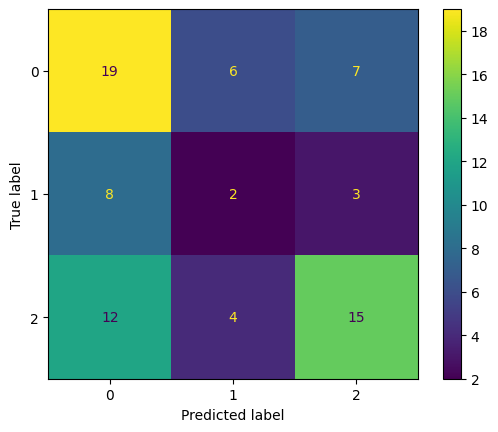

In [ ]:
X = matches_with_all_club_stats.drop(columns = ['FTR'])
y = matches_with_all_club_stats['FTR']

# split into training and testing sets
split_index = int(len(X)*.8)
X_train = X[0:split_index]
X_test = X[split_index:]
y_train = y[0:split_index]
y_test = y[split_index:]


# train and predict outcome of matches based on the aggregated player statistics
all_agg_stats_model = RandomForestClassifier(n_estimators=1000, random_state=42)
all_agg_stats_model.fit(X_train, y_train)

y_pred = all_agg_stats_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0.0)

print("Clubs represented by the means of all player stats:")
print("Accuracy: ", acc)
print("Classification Report:\n", cr)

ConfusionMatrixDisplay.from_estimator(all_agg_stats_model, X_test, y_test);

#### Predict Match outcomes from subset of player statistics that represent "reliability"

In [ ]:
# get the 5 stats that best represent reliability according to the two tests above (RF feature importance and pearson correlation coefficient)
reliability_stats = list(set(importance.head(5)["Player Statistic"]).union(set(reliability_corr_df.head(5)["Player Statistic"])))
print("Subset of stats to represent reliability:", reliability_stats)

Subset of stats to represent reliability: ['Losses', 'Wins', 'Tackles', 'Clearances off line', 'Last man tackles', 'Passes', 'Duels won', 'Clean sheets', 'Passes per match']


In [ ]:
# same as previous section but getting only the subset of stats representing reliability
def get_club_stats_subset(team):
  players_in_club = players.loc[players['Club'] == team]
  return players_in_club[[col for col in players_in_club.columns if col in reliability_stats]].mean()

get_club_stats_subset("Arsenal")

,0
Wins,37.222222
Losses,18.592593
Clean sheets,22.400000
Tackles,95.846154
Last man tackles,1.111111
Clearances off line,1.111111
Duels won,314.368421
Passes,3186.962963
Passes per match,39.104444


In [ ]:
matches_with_club_stats_2 = betting[["HomeTeam", "AwayTeam", "FTR"]].copy()

# convert FTR strings to integers for classification (0=A, 1=D, 2=H)
le_FTR = LabelEncoder()
matches_with_club_stats_2['FTR'] = le.fit_transform(matches_with_club_stats_2['FTR'])

print("Matches:")
matches_with_club_stats_2

Matches:


,HomeTeam,AwayTeam,FTR
0,Fulham,Arsenal,0
1,Crystal Palace,Southampton,2
2,Liverpool,Leeds,2
3,West Ham,Newcastle,0
4,West Brom,Leicester,0
...,...,...,...
375,Liverpool,Crystal Palace,2
376,Man City,Everton,2
377,Sheffield United,Burnley,2
378,West Ham,Southampton,2


In [ ]:
# Replace the "HomeTeam" and "AwayTeam" columns of matches with their representation based on aggregated player stas
def replace_clubs_with_subset_stats(matches_with_club_stats):
    new_row = []
    for _, row in matches_with_club_stats.iterrows():
        home_team_stats = get_club_stats_subset(row['HomeTeam'])
        away_team_stats = get_club_stats_subset(row['AwayTeam'])

        match_data = pd.concat([home_team_stats, away_team_stats]).to_frame().T
        match_data['FTR'] = row['FTR']
        new_row.append(match_data)

    updated_matches_df = pd.concat(new_row)
    return updated_matches_df

matches_with_club_reliability_stats = replace_clubs_with_subset_stats(matches_with_club_stats_2)

matches_with_club_reliability_stats.head(5)

,Wins,Losses,Clean sheets,Tackles,Last man tackles,Clearances off line,Duels won,Passes,Passes per match,Wins,Losses,Clean sheets,Tackles,Last man tackles,Clearances off line,Duels won,Passes,Passes per match,FTR
0,4.956522,13.956522,1.454545,33.500000,0.000000,0.250000,94.250000,735.739130,29.326087,37.222222,18.592593,22.400000,95.846154,1.111111,1.111111,314.368421,3186.962963,39.104444,0
0,52.480000,65.600000,38.545455,258.652174,5.555556,3.666667,815.352941,4556.280000,25.664000,29.636364,38.318182,16.600000,120.105263,1.000000,0.857143,395.071429,2480.727273,25.875000,2
0,62.678571,21.392857,31.222222,146.480000,1.666667,1.166667,419.526316,4058.892857,33.981071,2.533333,5.666667,0.000000,13.400000,0.250000,0.000000,33.500000,320.133333,31.770667,2
0,31.391304,38.739130,19.888889,147.500000,0.833333,1.166667,519.437500,3195.000000,28.350870,27.666667,39.888889,19.454545,105.200000,1.444444,1.444444,340.300000,2429.555556,25.596296,0
0,17.608696,19.000000,13.800000,76.666667,1.250000,1.375000,253.666667,1335.260870,22.110870,34.206897,30.275862,22.583333,122.192308,1.111111,0.777778,357.333333,2454.241379,32.627586,0


Clubs represented by only "reliability" stats:
Accuracy:  0.4868421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.59      0.54        32
           1       0.12      0.08      0.10        13
           2       0.59      0.55      0.57        31

    accuracy                           0.49        76
   macro avg       0.40      0.41      0.40        76
weighted avg       0.47      0.49      0.47        76



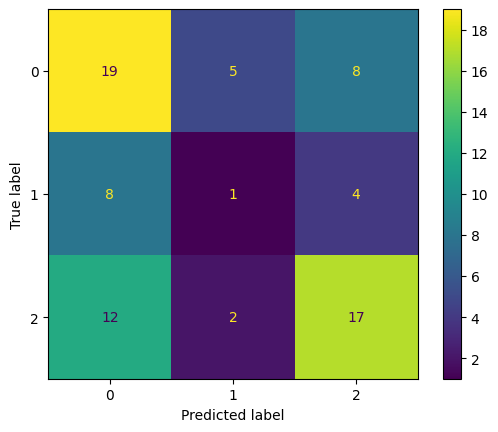

In [ ]:
X = matches_with_club_reliability_stats.drop(columns = ['FTR'])
y = matches_with_all_club_stats['FTR']

# split into training and testing sets
split_index = int(len(X)*.8)
X_train = X[0:split_index]
X_test = X[split_index:]
y_train = y[0:split_index]
y_test = y[split_index:]


# train and predict outcome of matches based on the aggregated player statistics
agg_reliability_stats_model = RandomForestClassifier(n_estimators=1000, random_state=42)
agg_reliability_stats_model.fit(X_train, y_train)

y_pred = agg_reliability_stats_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0.0)

print("Clubs represented by only \"reliability\" stats:")
print("Accuracy: ", acc)
print("Classification Report:\n", cr)

ConfusionMatrixDisplay.from_estimator(agg_reliability_stats_model, X_test, y_test);

Important result: using only the most "reliable" aggregated stats to predict the outcome of a match had the same (even better) accuracy than using all stats

#### Aggregate Player Stats

In [ ]:
# Goals per match for players
players['Goals per match'] = players['Goals'] / players['Appearances']

# Assists per match for players
players['Assists per match'] = players['Assists'] / players['Appearances']

# Shots per match for players
players['Shots per match'] = players['Shots'] / players['Appearances']

# Tackles per match for players
players['Tackles per match'] = players['Tackles'] / players['Appearances']

#Saves per match for goalies
players['Saves per match'] = players['Saves'] / players['Appearances']

# Replace 0 with NaN for specific stats
columns_to_replace = ['Goals per match', 'Assists per match', 'Shots per match', 'Tackles per match']

# Apply replacement only for rows where Position is 'Goalkeeper'
players.loc[players['Position'] == 'Goalkeeper', columns_to_replace] = (
    players.loc[players['Position'] == 'Goalkeeper', columns_to_replace].replace(0, np.nan)
)

filtered_players = players.copy()


filtered_players = players[players['Appearances'] > 4]

In [ ]:
# select relevant columns
relevant_players_stats = filtered_players[[col for col in players.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality']]]

# convert reliability strings into numbers (for corr)
reliability_mapping = {'very unreliable': 1, 'unreliable': 2, 'neutral': 3, 'reliable': 4, 'very reliable': 5}
if isinstance(relevant_players_stats['Reliability'][0], str):
  relevant_players_stats.loc[:, 'Reliability'] = relevant_players_stats['Reliability'].map(reliability_mapping)

correlation_matrix = relevant_players_stats.corr()
reliability_corr = correlation_matrix['Reliability'].sort_values(ascending=False)

print("Correlation with Reliability:")
reliability_corr.head(6)

Correlation with Reliability:


,Reliability
Reliability,1.000000
Last man tackles,0.272476
Wins,0.241914
Duels won,0.224778
Appearances,0.223607
Tackles,0.214419


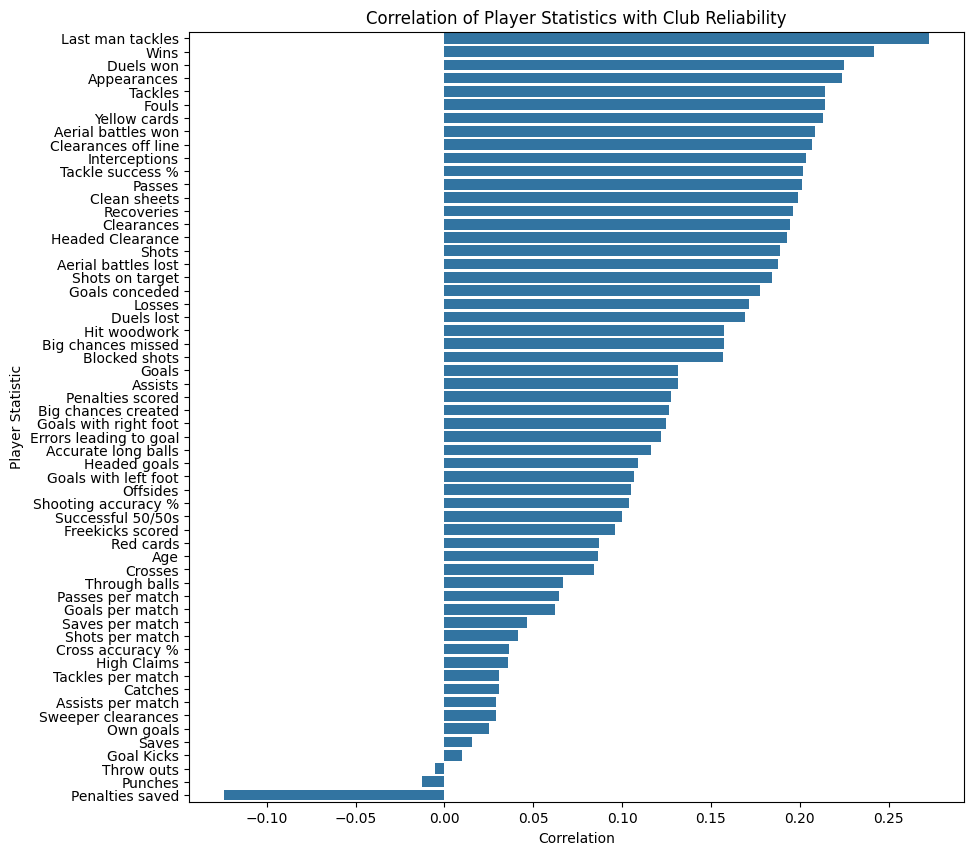

In [ ]:
# show correlations via graph
reliability_corr_df = reliability_corr.drop('Reliability').reset_index()
reliability_corr_df.columns = ['Player Statistic', 'Correlation']

plt.figure(figsize=(10, 10))
plt.title('Correlation of Player Statistics with Club Reliability')
sns.barplot(x='Correlation', y='Player Statistic', data=reliability_corr_df)
plt.show()

In [ ]:
print(f"Variable with the highest correlation is \"{correlation_matrix['Reliability'][:-1].sort_values(ascending=False).index[1]}\" with coefficient {correlation_matrix['Reliability'][:-1].sort_values(ascending=False).iloc[1]}")

Variable with the highest correlation is "Last man tackles" with coefficient 0.27247627879290576


All of the added statistics have just slight positive correlations.

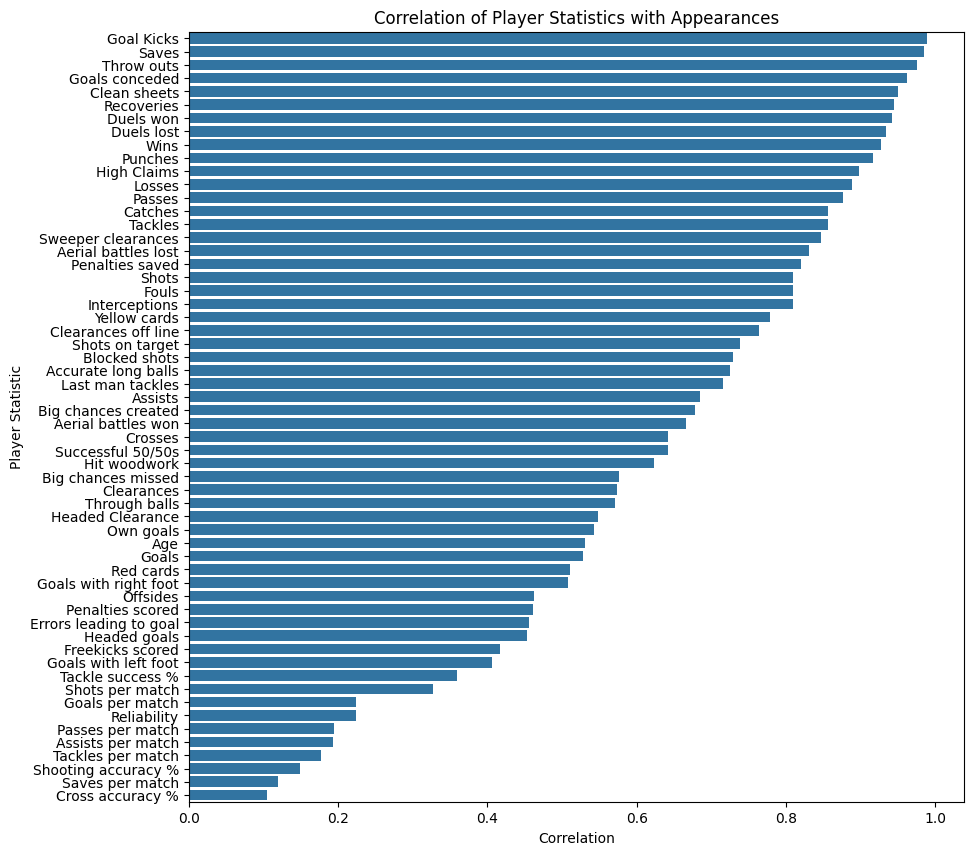

In [ ]:
# show correlations with "appearances" via graph
appearances_corr = correlation_matrix['Appearances'].sort_values(ascending=False)

appearances_corr_df = appearances_corr.drop('Appearances').reset_index()
appearances_corr_df.columns = ['Player Statistic', 'Correlation']

plt.figure(figsize=(10, 10))
plt.title('Correlation of Player Statistics with Appearances')
sns.barplot(x='Correlation', y='Player Statistic', data=appearances_corr_df)
plt.show()

The correlation with the statistics added are positive, but small. This makes sense as these are averaged using appearances therefore more apperances will not automatically mean your averages will go up, hence a weak correlation.

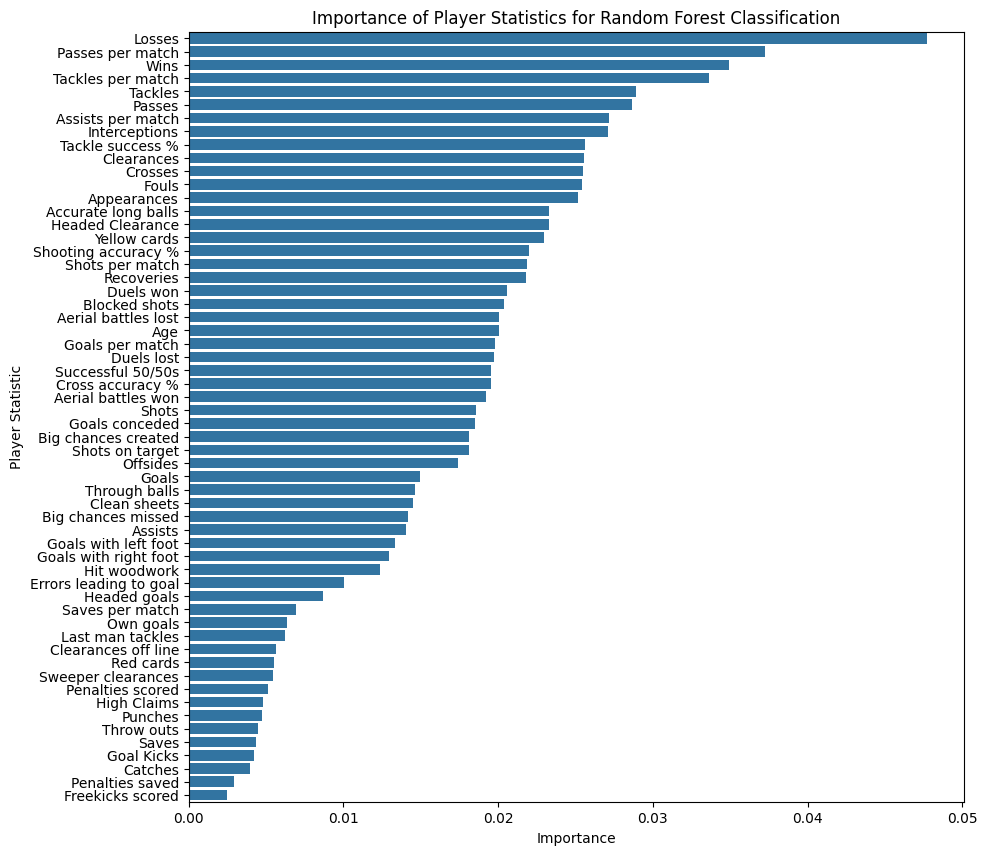

In [ ]:
# get measure of "feature importance"
rf = RandomForestClassifier(n_estimators=1000, random_state=42) # https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
rf.fit(filtered_players[[col for col in filtered_players.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality', 'Reliability']]], filtered_players['Reliability'])

# visualize
plt.figure(figsize=(10, 10))
plt.title('Importance of Player Statistics for Random Forest Classification')

importance = pd.DataFrame({
    'Player Statistic': [col for col in filtered_players.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality', 'Reliability']],
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Player Statistic', data=importance) # https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.show()

We added 5 statistics so there are now 58 player statistics. 1/58 = 0.017

In [ ]:
importance.loc[importance['Importance'] > 0.03].sort_values('Importance', ascending=False)

,Player Statistic,Importance
3,Losses,0.047712
35,Passes per match,0.037262
2,Wins,0.034930
56,Tackles per match,0.033599


Tackles per match is found to be important, while Goals per match, Assists per match, Shots per match, and Saves per match don't quite meet the threshold.

#### Predict Match outcomes from all player statistics including the 5 added

In [ ]:
# get players in a club (only stat columns) and take their mean as a way to represent a club by their player's stats
def get_club_stats(team):
  players_in_club = filtered_players.loc[filtered_players['Club'] == team]
  return players_in_club[[col for col in players_in_club.columns if col not in ['Name', 'Club', 'Jersey Number', 'Position', 'Nationality', 'Reliability']]].mean()

get_club_stats("Arsenal").head(5)

,0
Age,25.64
Appearances,78.84
Wins,40.12
Losses,20.04
Goals,9.20


In [ ]:
matches_with_club_stats = betting[["HomeTeam", "AwayTeam", "FTR"]].copy()

# convert FTR strings to integers for classification (0=A, 1=D, 2=H)
le_FTR = LabelEncoder()
matches_with_club_stats['FTR'] = le.fit_transform(matches_with_club_stats['FTR'])

print("Matches:")
matches_with_club_stats

Matches:


,HomeTeam,AwayTeam,FTR
0,Fulham,Arsenal,0
1,Crystal Palace,Southampton,2
2,Liverpool,Leeds,2
3,West Ham,Newcastle,0
4,West Brom,Leicester,0
...,...,...,...
375,Liverpool,Crystal Palace,2
376,Man City,Everton,2
377,Sheffield United,Burnley,2
378,West Ham,Southampton,2


In [ ]:
# Replace the "HomeTeam" and "AwayTeam" columns of matches with their representation based on aggregated player stas
def replace_clubs_with_stats(matches_with_club_stats):
    new_row = []
    for _, row in matches_with_club_stats.iterrows():
        home_team_stats = get_club_stats(row['HomeTeam'])
        away_team_stats = get_club_stats(row['AwayTeam'])

        match_data = pd.concat([home_team_stats, away_team_stats]).to_frame().T
        match_data['FTR'] = row['FTR']
        new_row.append(match_data)

    updated_matches_df = pd.concat(new_row)
    return updated_matches_df

matches_with_all_club_stats = replace_clubs_with_stats(matches_with_club_stats)

matches_with_all_club_stats.head(5)

,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,...,Yellow cards,Red cards,Fouls,Offsides,Goals per match,Assists per match,Shots per match,Tackles per match,Saves per match,FTR
0,27.647059,30.529412,6.529412,18.470588,2.411765,0.647059,1.470588,0.294118,0.500000,0.000000,...,12.080000,0.520000,64.320000,12.708333,0.105237,0.083395,1.026481,1.286807,3.468750,0
0,29.043478,166.565217,56.956522,71.260870,15.608696,3.619048,9.095238,4.285714,3.000000,0.416667,...,11.350000,0.400000,83.700000,19.941176,0.090309,0.078919,1.195131,1.275842,2.851677,2
0,26.000000,115.346154,67.384615,22.961538,17.192308,2.739130,9.434783,6.869565,1.764706,0.647059,...,2.500000,0.000000,23.500000,5.000000,0.060572,0.084956,0.971779,1.002295,NaN,2
0,28.550000,105.750000,35.950000,44.450000,9.300000,1.647059,5.764706,3.529412,2.909091,0.818182,...,12.148148,0.592593,73.703704,15.520000,0.094071,0.060795,1.194254,1.252961,3.030574,0
0,28.600000,72.400000,26.866667,28.133333,6.200000,1.666667,3.200000,1.333333,0.777778,0.000000,...,8.923077,0.653846,67.576923,14.625000,0.091101,0.079843,1.132181,1.461567,3.098003,0


Clubs represented by the means of all player stats:
Accuracy:  0.5131578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.66      0.59        32
           1       0.22      0.15      0.18        13
           2       0.57      0.52      0.54        31

    accuracy                           0.51        76
   macro avg       0.44      0.44      0.44        76
weighted avg       0.50      0.51      0.50        76



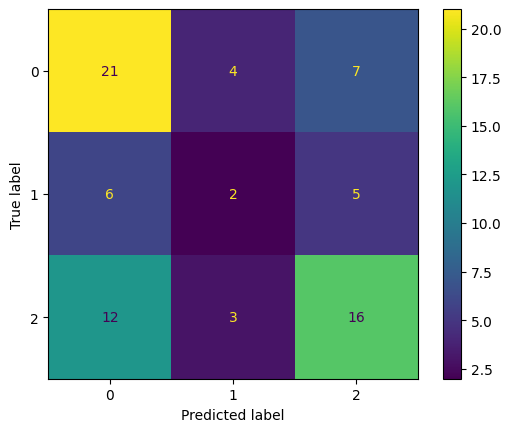

In [ ]:
X = matches_with_all_club_stats.drop(columns = ['FTR'])
y = matches_with_all_club_stats['FTR']

# split into training and testing sets
split_index = int(len(X)*.8)
X_train = X[0:split_index]
X_test = X[split_index:]
y_train = y[0:split_index]
y_test = y[split_index:]


# train and predict outcome of matches based on the aggregated player statistics
all_agg_stats_model = RandomForestClassifier(n_estimators=1000, random_state=42)
all_agg_stats_model.fit(X_train, y_train)

y_pred = all_agg_stats_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0.0)

print("Clubs represented by the means of all player stats:")
print("Accuracy: ", acc)
print("Classification Report:\n", cr)

ConfusionMatrixDisplay.from_estimator(all_agg_stats_model, X_test, y_test);

In [ ]:
# get the 5 stats that best represent reliability according to the two tests above (RF feature importance and pearson correlation coefficient)
reliability_stats = list(set(importance.head(5)["Player Statistic"]).union(set(reliability_corr_df.head(5)["Player Statistic"])))
print("Subset of stats to represent reliability:", reliability_stats)

Subset of stats to represent reliability: ['Losses', 'Wins', 'Tackles', 'Last man tackles', 'Tackles per match', 'Duels won', 'Appearances', 'Passes per match']


In [ ]:
# same as previous section but getting only the subset of stats representing reliability
def get_club_stats_subset(team):
  players_in_club = filtered_players.loc[filtered_players['Club'] == team]
  return players_in_club[[col for col in players_in_club.columns if col in reliability_stats]].mean()

get_club_stats_subset("Arsenal")

,0
Appearances,78.840000
Wins,40.120000
Losses,20.040000
Tackles,103.708333
Last man tackles,1.250000
Duels won,350.647059
Passes per match,37.592800
Tackles per match,1.286807


In [ ]:
matches_with_club_stats_2 = betting[["HomeTeam", "AwayTeam", "FTR"]].copy()

# convert FTR strings to integers for classification (0=A, 1=D, 2=H)
le_FTR = LabelEncoder()
matches_with_club_stats_2['FTR'] = le.fit_transform(matches_with_club_stats_2['FTR'])

print("Matches:")
matches_with_club_stats_2

Matches:


,HomeTeam,AwayTeam,FTR
0,Fulham,Arsenal,0
1,Crystal Palace,Southampton,2
2,Liverpool,Leeds,2
3,West Ham,Newcastle,0
4,West Brom,Leicester,0
...,...,...,...
375,Liverpool,Crystal Palace,2
376,Man City,Everton,2
377,Sheffield United,Burnley,2
378,West Ham,Southampton,2


In [ ]:
# Replace the "HomeTeam" and "AwayTeam" columns of matches with their representation based on aggregated player stas
def replace_clubs_with_subset_stats(matches_with_club_stats):
    new_row = []
    for _, row in matches_with_club_stats.iterrows():
        home_team_stats = get_club_stats_subset(row['HomeTeam'])
        away_team_stats = get_club_stats_subset(row['AwayTeam'])

        match_data = pd.concat([home_team_stats, away_team_stats]).to_frame().T
        match_data['FTR'] = row['FTR']
        new_row.append(match_data)

    updated_matches_df = pd.concat(new_row)
    return updated_matches_df

matches_with_club_reliability_stats = replace_clubs_with_subset_stats(matches_with_club_stats_2)

matches_with_club_reliability_stats.head(5)

,Appearances,Wins,Losses,Tackles,Last man tackles,Duels won,Passes per match,Tackles per match,Appearances,Wins,Losses,Tackles,Last man tackles,Duels won,Passes per match,Tackles per match,FTR
0,30.529412,6.529412,18.470588,39.058824,0.000000,114.692308,29.480588,1.240444,78.840000,40.120000,20.040000,103.708333,1.250000,350.647059,37.592800,1.286807,0
0,166.565217,56.956522,71.260870,283.190476,5.555556,866.062500,27.439130,1.591508,99.800000,32.550000,42.100000,134.117647,1.166667,460.083333,25.462500,1.275842,2
0,115.346154,67.384615,22.961538,159.173913,1.666667,468.705882,33.229615,1.098193,35.250000,7.250000,18.500000,36.750000,NaN,146.000000,23.932500,1.002295,2
0,105.750000,35.950000,44.450000,173.000000,0.833333,592.357143,30.649500,1.505770,89.222222,27.666667,39.888889,105.200000,1.444444,340.300000,25.596296,1.252961,0
0,72.400000,26.866667,28.133333,106.400000,1.666667,344.000000,21.186667,1.080739,92.846154,38.000000,33.653846,132.166667,1.428571,393.736842,31.026923,1.461567,0


Clubs represented by only "reliability" stats:
Accuracy:  0.5263157894736842
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.57        32
           1       0.25      0.23      0.24        13
           2       0.62      0.58      0.60        31

    accuracy                           0.53        76
   macro avg       0.47      0.47      0.47        76
weighted avg       0.52      0.53      0.52        76



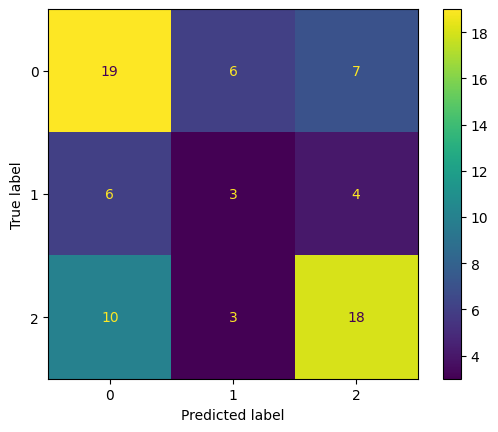

In [ ]:
X = matches_with_club_reliability_stats.drop(columns = ['FTR'])
y = matches_with_all_club_stats['FTR']

# split into training and testing sets
split_index = int(len(X)*.8)
X_train = X[0:split_index]
X_test = X[split_index:]
y_train = y[0:split_index]
y_test = y[split_index:]


# train and predict outcome of matches based on the aggregated player statistics
agg_reliability_stats_model = RandomForestClassifier(n_estimators=1000, random_state=42)
agg_reliability_stats_model.fit(X_train, y_train)

y_pred = agg_reliability_stats_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0.0)

print("Clubs represented by only \"reliability\" stats:")
print("Accuracy: ", acc)
print("Classification Report:\n", cr)

ConfusionMatrixDisplay.from_estimator(agg_reliability_stats_model, X_test, y_test);